<a href="https://colab.research.google.com/github/19522531/CS114.L21/blob/main/B%C3%A0i%20t%E1%BA%ADp%20colab%20s%E1%BB%91%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


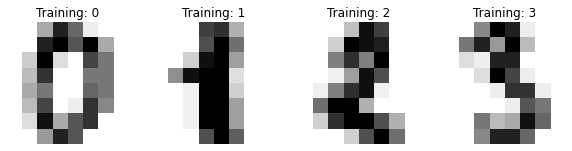

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

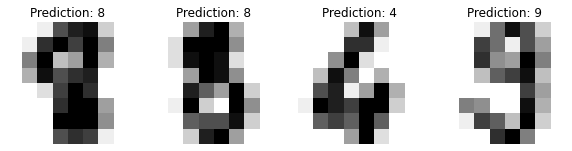

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


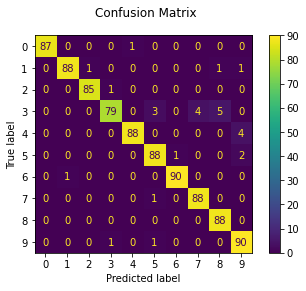

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

- Input: ảnh từ webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


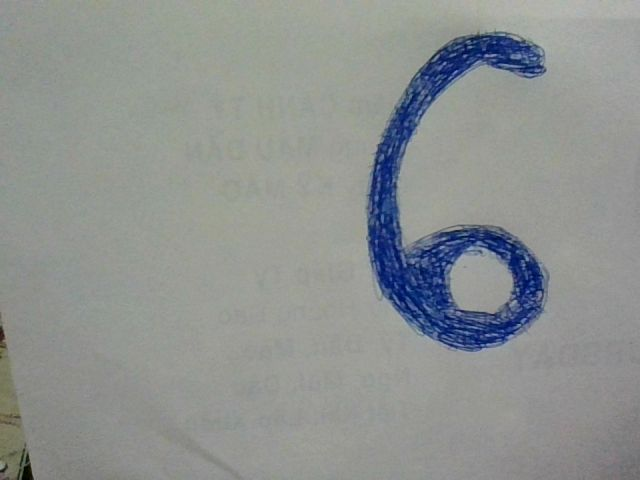

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

- Các thao tác xử lý ảnh trước khi đưa vào nhận diện:
++ Vì các ảnh được huấn luyện là các ma trận cỡ 8x8 và là các ảnh xám, ảnh nhị phân nên bọn em sẽ xử lý ảnh để có giống với những đặc điểm ảnh trong bộ dữ liệu.
++ Để làm điều này ta sử dụng thư viện cv2

In [ ]:
import cv2

In [ ]:
image = cv2.imread('photo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #chuyển sang ảnh xám
ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY) #chuyển sang ảnh nhị phân
ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA) #resize lại kích cỡ (8x8)
norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
result = norm_image.reshape(-1, 64)


- Kích thước của mảng

In [ ]:
result.shape

(1, 64)

- Output:

In [ ]:
predict = clf.predict(result)
print(predict)

[3]


#Kết luận bài tập colab số 1 sklearn hand-written digits recognition
1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
- Kết quả chạy thực tế với webcam của laptop và giấy viết tay cho kết quả thực tế không tốt.
2. Dựa vào đâu để kết luận?
- Dựa vào kết quả thử nghiệm nhiều lần bằng webcam và giấy viết tay hầu hết đều cho kết quả không đúng.
3. Nguyên nhân.
- Các bức ảnh được đưa vào huấn luyện khác xa so với các bức ảnh upload lên ở nhiều mặt như: chất lượng ảnh, độ phân giải hay được chụp ở nhiều phía, ...
- Đặc biệt là khi upload ảnh bằng webcam thì còn bị tác động bởi các yếu tố khác như ánh sáng có thể làm cho ảnh không rõ nét, hay do chất lượng camera,...
- Hoặc cũng có thể một phần do tiền xử lý ảnh chưa được tốt chưa được tối ưu giống những ảnh được huấn luyện vì bộ dataset đã được qua nhiều bước tiền xử lý rất tốt nên kết quả khi test cho accuracy cao (97%) nhưng thực tế khi chưa được tiền xử lý tốt sẽ dẫn đến kết quả sai lệch.
- Ngoài ra, do dữ liệu trong bộ dataset chỉ có một số cụ thể rõ ràng nhưng hình dạng tổng thể của một số số có thể xảy ra nhập nhằng trong thực tế như số 0 sẽ rất dễ sai lệch và nhập nhằng trong thực tế. Ví dụ số 8 có thể phát hiện sai thành 2 số 0. Hoặc trong tập train có nhiều số 1 ở bên trái thì khi trong thực tế tương tự số 1 ở bên phải dễ phát hiện sai thành số 7

(<a href="https://imgbb.com/"><img src="https://i.ibb.co/XjnvBFC/01.png" alt="01" border="0"></a>)
<a href="https://imgbb.com/"><img src="https://i.ibb.co/D8DkChw/02.png" alt="02" border="0"></a>
4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
- Theo em nghĩ, nếu model này tốt thì có thể áp dụng được vào những bài toán phức tạp vì ý tưởng của em như thế này:
++ Nếu mình đã có hình ảnh một biển số thì thông qua xử lý ảnh mình sẽ cắt hay chia tấm ảnh thành những con số riêng lẻ rồi cho vào danh sách. Và mỗi chữ số riêng lẻ đó lại được nhận dạng bằng model trên, nếu model đó quá tốt thì hiển nhiên từng chữ số sẽ được nhận diện rất tốt.
5. Nguồn
- Upload ảnh từ webcam: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
- Xử lý ảnh:
https://blog.vietnamlab.vn/xu-ly-anh-voi-opencv-tut-2-chuyen-doi-anh-mau/


